**BASIC EDA ON AI SATURDAYS EVENT IN OGBOMOSO, NIGERIA.**

Hey Guys! I had fun recently participating in a three day python training for the second cohort of LAUTECH AI-Saturdays member. The event was organized by the LAUTECH Data Science Community. I volunteered to help teach python programming to the attendees. I really had fun teaching and helping. We collected participation data for all three days the event held and so after everything, I decided to do some basic exploratory data analysis (EDA) on the data we had collected. I wanted to answer some basic questions like:
    
> Which department in school had the highest participants?
> Which set of students attended more? Were they freshers, final year students, or graduates? 
     
And also, I wanted to have fun! Fun for me is analyzing data. So, Let’s walk through this exploration together.
     
     
    

The first thing I did was to get the data. Then I  created a jupyter notebook for the experiment and imported the necessary python modules I’d need  for this data analysis. (Pandas, Numpy and Matplotlib)

Numpy provides me with high performance, multi-dimensional array and the important functions to manipulate these arrays.
Pandas gives me access to useful functions for working with the csv dataset and finally, Matplotlib which I use for the data visualization. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

Next, I read in the dataset using the pandas read_csv() function and then plot the first five rows of the data.

In [2]:
data_ai= pd.read_csv('jd.csv')


In [4]:
data_ai.head()

,Username,Full name,Phone Number,Department,Level,Availability,Day 1,Day 2,Day 3
0,paschal.nduleo@gmail.com,Paschal Ndulue,8177449353,Computer science and engineering,300L,√,1.0,1.0,1.0
1,akinro.olubunmi25@gmail.com,Olubunmi Akinro,8163855102,Computer Science and engineering,500L,NaN,1.0,1.0,1.0
2,oluwadamilaredan@gmail.com,Dan Aremu,8161358288,Computer Science,500L,√,1.0,NaN,NaN
3,Oluwapemimary@gmail.com,Oluwapemi Oripeloye,8133354618,Animal Nutrition and Biotechnology,400L,NaN,1.0,1.0,0.0
4,gbadamosisulaiman1993@gmail.com,Sulaiman Gbadamosi,8163378007,Computer science,500L,NaN,1.0,1.0,1.0


We can see that the dataset contains nine columns.

> **Username:** Which surprisingly stores email.

> **Fullname:** Name of the participants.

> **Phone Number:** Phone Numbers of the participants.

> **Department:** The current department of study.

> **Level:** The current study level.

> **Availability:** This is column functions like an attendance marker.

 > **Day1, Day2 and Day3:** This is 1.0 if the participant is present otherwise it is 0.0.
 

In [5]:
data_ai.columns

Index(['Username', 'Full name', 'Phone Number ', 'Department ', 'Level',
       'Availability', 'Day 1', 'Day 2', 'Day 3'],
      dtype='object')

Then, I decided to investigate the levels column first. I wrote a code to print out the counts of students in each level.

In [6]:
degree_counts = data_ai['Level'].value_counts()
degree_counts

400L                        50
500L                        35
300L                        20
200L                         9
Graduate                     4
Anticipating corp member     1
Outgoing Finalist            1
Graduate                     1
Post Graduate                1
Fresh graduate               1
Fresh Graduate               1
Name: Level, dtype: int64

From the count result above, we can immediately see that 400L students had the highest attendeance. Interesting right?

Let's do a bar plot to make this more visual.

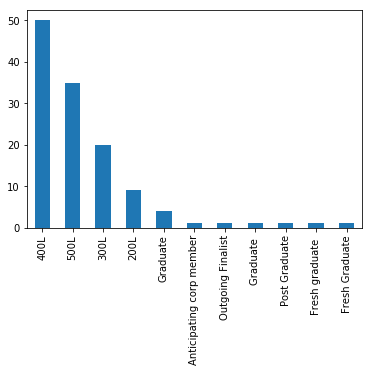

In [7]:
degree_counts.plot(kind='bar')
plt.show()

Now that's better. But I noticed something else. It seems that we have different texts for graduates. This was probably due to the fact that each individual filing the form, used a different text to identify themselves as graduates. I decided to group these category of people into just one group called graduates.

In [8]:
Level ={'Post Graduate': 'Graduate', 'Fresh graduate':'Graduate','Anticipating corp member' :'Graduate','Graduate ':'Graduate',\
        'Fresh Graduate':'Graduate','Outgoing Finalist':'Graduate'}
data_ai.replace(Level, inplace=True, regex=True)

After grouping, I counted the values again, and this time got a better result.

In [9]:
degree_counts = data_ai['Level'].value_counts()
degree_counts

400L        50
500L        35
300L        20
Graduate    10
200L         9
Name: Level, dtype: int64

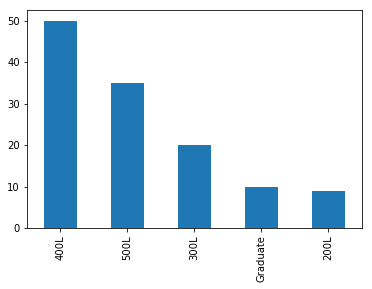

In [10]:
degree_counts.plot(kind='bar')
plt.show()

And, now we can clearly see that 400L students attended the most followed  by 500L students. 
Let's make a pie chart of this information too.

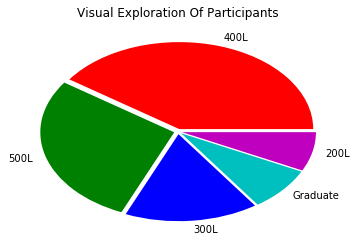

In [11]:
values = data_ai['Level'].value_counts()
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0.03, 0.03, 0.03, 0.03, 0.03]
labels = ['400L','500L','300L','Graduate','200L']
plt.pie(values, colors= colors, labels=labels, explode = explode)
plt.title('Visual Exploration Of Participants')
plt.show()

Following the same steps above, I decided to investigate the participants by their departments.

In [12]:
degree_counts1 = data_ai.iloc[:,3].value_counts()

degree_counts1

CSE                                                  17
Computer science and engineering                      6
Computer science and engineering                      5
Computer science                                      4
Computer Science                                      4
Cse                                                   4
Computer Science                                      3
Mechanical Engineering                                3
Computer science                                      3
Computer Science and Engineering                      3
computer science                                      2
Electronics Electrical Engineering                    2
Physiology                                            2
Biology                                               2
Anatomy                                               2
Mechanical Engineering                                2
URP                                                   1
Computer Science & Engineering                  

Well, As you can see, participants filled this field with differently. Some used upper cases while some used lower cases, some used different title for the same department. I decided to categorize these department into groups by replacing similar departments with the same name. 

In [18]:
Department = {'Computer science and engineering':'CSE','Computer science and engineering ':'CSE','Computer Science':'CSE',\
              'Computer science':'CSE','Cse':'CSE','Computer Science ':'CSE', 'Computer Science and Engineering':'CSE',\
              'Computer science':'CSE','computer science':'CSE', 'CSE ':'CSE','computer science and engineering':'CSE',\
             'Computer Science and engineering' :'CSE','C. S. E':'CSE','Computer Engineering':'CSE','cse':'CSE',\
              'Computer Science And Engineering':'CSE','CSEand Engineering':'CSE','COMPUTER SCIENCE AND ENGINEERING':'CSE',\
             'CSEAnd Engineering':'CSE','CSEand engineering':'CSE','CSE& Engineering':'CSE','CSEand engineering':'CSE',\
              'CSE ':'CSE','Mechanical Engineering':'MEE','Mechanical Engineering ':'MEE','Mechanical engineering':'MEE',\
             'MEE ':'MEE','Electronics Electrical Engineering':'EEE','Electronic electrical engineering':'EEE',\
             'Electrical Electronics Engineering':'EEE','Electrical electronics engineering':'EEE',\
              'Electronic and Electrical Engineering':'EEE','EEE ':'EEE','PURE AND APPLIED BIOLOGY':'BIOLOGY',\
             'Pure and applied biology':'BIOLOGY','Pure and Applied Biology':'BIOLOGY','Biology':'BIOLOGY',\
              'Pure and applied mathematics':'MATHEMATICS','Pure and applied mathematics ':'MATHEMATICS',\
              'Pure and Applied Mathematics':'MATHEMATICS','Pure and applied mathematics ':'MATHEMATICS',\
              'Pure and applied Mathematics ':'MATHEMATICS','MATHEMATICS ':'MATHEMATICS','PAM':'MATHEMATICS',\
              'Pure and applied physics':'PHYSICS','Pure and Applied Physics':'PHYSICS','Pure and Applied Physics':'PHYSICS',\
              'Pure and applied physics':'PHYSICS',' PHYSICS':'PHYSICS','ANIMAL NUTRITION AND BIOTECHNOLOGY':'ANB',\
              'Animal Nutrition and Biotechnology':'ANB','DEPARTMENT OF ANIMAL NUTRITION AND BIOTECHNOLOGY':'ANB',\
             'DEPARTMENT OF ANB':'ANB','Pure & applied chemistry':'CHEMISTRY','Pure and Applied Chemistry':'CHEMISTRY',\
              'Pure and Applied Chemistry ':'CHEMISTRY','Agricultural Economics':'AEC','Agricultural Economics ':'AEC',\
              'chemical engineering':'CHE','Chemical Engineering':'CHE','CHEMICAL ENGINEERING':'CHE','chemical engineering ':\
              'CHE','CHE ':'CHE','Animal production and health':'APH','Animal production and health ':'APH','APH ':'APH',\
             'Transport management and highway engineering':'TRANSPORT','Transport Management':'TRANSPORT',\
            'Transport Management':'TRANSPORT','TRANSPORT ':'TRANSPORT','Statistics':'STATISTICS','Statistics ':'STATISTICS',\
             'STATISTICS ':'STATISTICS','Food Science and Engineering':'FSE','Agricultural Engineering':'AGE',\
              'Urban and Regional Planning':'URP','CHEMISTRY ':'CHEMISTRY','CIVIL ENGINEERING':'CVE','ANB ':'ANB','AEC ':'AEC',\
              'BIOLOGY ':'BIOLOGY', ' CSE':'CSE', 'PHYSICS ':'PHYSICS',' CSE':'CSE'}
data_ai.replace(Department, inplace=True,regex=True)

After replacing the fields, I did a value count and got a better and cleaner result.

In [19]:
degree_counts1 = data_ai.iloc[:,3].value_counts()

degree_counts1

CSE            61
MEE             7
MATHEMATICS     6
BIOLOGY         6
EEE             6
PHYSICS         4
CHE             4
CHEMISTRY       3
TRANSPORT       3
ANB             3
Physiology      2
STATISTICS      2
URP             2
APH             2
AEC             2
Anatomy         2
S.L.T           1
CVE             1
AGE             1
AER             1
FSE             1
Accounting      1
Marketing       1
Name: Department , dtype: int64

And it seems, CSE (Computer Science) has the highest attendance. I kinda expected that since its a technology related field, But I wanted to confirm my hypothesis.

Next, let's make a bar chart to visualize this properly.

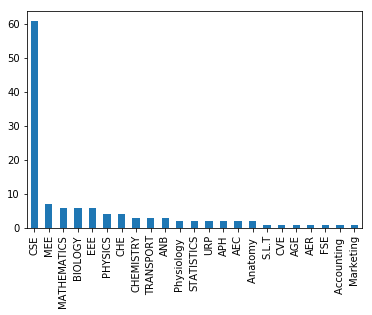

In [20]:
degree_counts1.plot(kind='bar')
plt.show()

In [ ]:
And then, a pie chart.

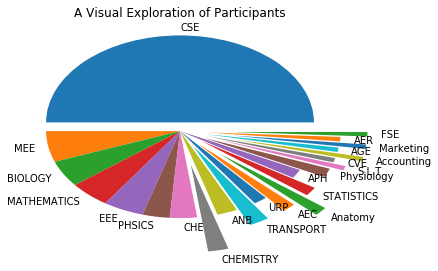

In [23]:
values = degree_counts1
explode = [0.1,0,0,0,0,0,0,0.4,0,0.2,0,0.2,0.4,0.2,0,0.2,0.3,0.2,0.4,0.2,0.4,0.2,0.4]
labels = ['CSE','MEE','BIOLOGY','MATHEMATICS','EEE','PHSICS','CHE','CHEMISTRY','ANB','TRANSPORT','URP','AEC','Anatomy',\
         'STATISTICS','APH','Physiology','S.L.T','CVE','Accounting','AGE','Marketing','AER','FSE']
plt.pie(values, labels = labels,explode=explode)
plt.title('A Visual Exploration of Participants')
plt.show()

And finally, more fancy colored plot before I go.

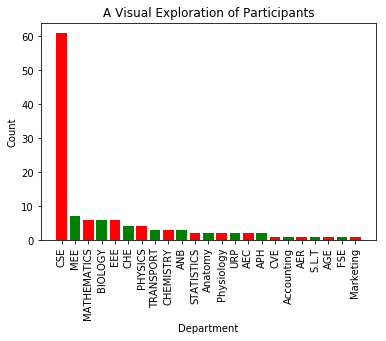

In [24]:
import numpy as np
values = degree_counts1
objects = ('CSE','MEE','MATHEMATICS','BIOLOGY','EEE','CHE','PHYSICS','TRANSPORT','CHEMISTRY','ANB','STATISTICS','Anatomy',\
         'Physiology','URP','AEC','APH','CVE','Accounting','AER','S.L.T','AGE','FSE','Marketing')
colors = ['r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r']
x_pos = np.arange(len(objects))
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(x_pos,objects,rotation=90)
plt.bar(range(0,23),values,color=colors)
plt.title('A Visual Exploration of Participants')
plt.show()

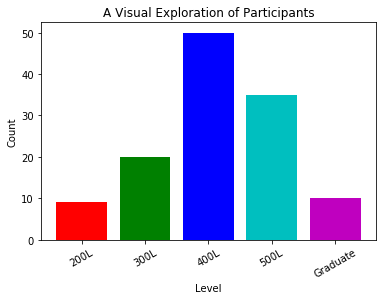

In [26]:
values = [9,20,50,35,10] 
objects = ('200L','300L','400L','500L','Graduate')
colors = ['r', 'g', 'b', 'c', 'm']
x_pos = np.arange(len(objects))
plt.bar(range(5), values, color= colors)
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(x_pos,objects,rotation=30)
plt.title('A Visual Exploration of Participants')
plt.show()

Well, I was able to answer the questions I raised before exploring this data and so decided to call it a day here. 

I hope this was worth your time and you probably learnt a thing or two. I would also like to urge participants of the AI Saturdays to make good use of all that they would learn in the upcoming weeks. 

Well, Bye for now.

You can follow me on twitter here, instagram here and facebook here.